# Scaling data using the Robust Scaler

In scaling with the StandardScaler we see that the standard scaler is very sensitive to outliers because outliers can change the mean of your data. In using the robust scaler we can scale teh data in such a way that it robust to the presence of outliers. We can import the robust scaler similar to how we imported the standard scaler form scikit-learn's preprocessing

Lets go ahead and import the RobustScaler estimator API and the robust_scale function, here we will use a simple hand made dataset to compare and contrast the Robust Scaler and Standard Scaler 


In [1]:
import pandas as pd
import numpy as np

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler, robust_scale

In [2]:
simple_data = pd.DataFrame({
    'students': ['Alice', 'Bob', 'Charlie', 'Dory', 'Emily'],
    'scores': [40, 42, 45, 48, 50]
})

In [3]:
simple_data.head()

,students,scores
0,Alice,40
1,Bob,42
2,Charlie,45
3,Dory,48
4,Emily,50


In [4]:
simple_data.describe()

,scores
count,5.000000
mean,45.000000
std,4.123106
min,40.000000
25%,42.000000
50%,45.000000
75%,48.000000
max,50.000000


We have purposely set the the scores to be evenly spread out around the mean

In [5]:
simple_data['scores'] = simple_data['scores'].astype(np.float64)

In [6]:
simple_data['scaled_scores'] = scale(simple_data['scores'])

In [7]:
simple_data.describe()

,scores,scaled_scores
count,5.000000,5.000000e+00
mean,45.000000,4.440892e-17
std,4.123106,1.118034e+00
min,40.000000,-1.355815e+00
25%,42.000000,-8.134892e-01
50%,45.000000,0.000000e+00
75%,48.000000,8.134892e-01
max,50.000000,1.355815e+00


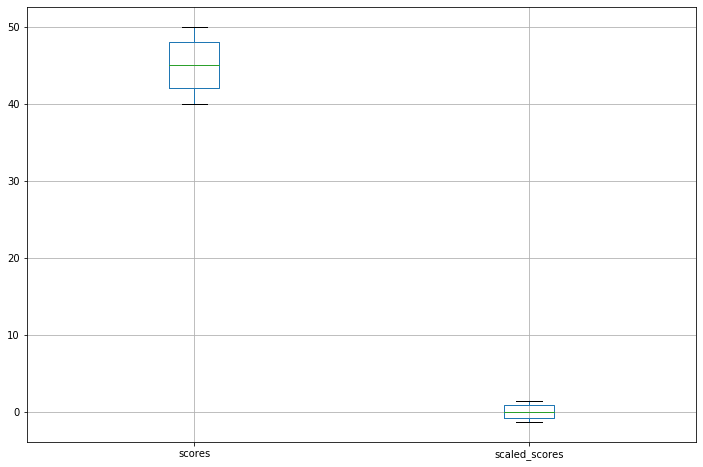

In [8]:
simple_data.boxplot(figsize=(12, 8))

First, we will apply Robust Scaling manually to get an idea of how the underlying matematical functions work
- The robust scaler uses median data and the IQR to perform scaling, since they are both less sensitive to outliers in the data
- We subtract the median instead of the mean and divide by the IQR


In [9]:
def robust_scale_manual(x, median, q25, q75):
    
    scaled = (x - median) / (q75 - q25)
    
    return scaled

In [10]:
median = simple_data['scores'].median()

q25 = simple_data['scores'].quantile(q=0.25)

q75 = simple_data['scores'].quantile(q=0.75)

In [11]:
simple_data['robust_scaled_scores'] = simple_data['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [12]:
simple_data.head()

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-1.355815,-0.833333
1,Bob,42.0,-0.813489,-0.500000
2,Charlie,45.0,0.000000,0.000000
3,Dory,48.0,0.813489,0.500000
4,Emily,50.0,1.355815,0.833333


Since we purposely set up the data to contain no outliers and to be evenly distrubuted around the mean, the standard scale and robust scaled outputs are not that different

Lets see how this would change if we introduce an outlier

In [13]:
new_data = pd.DataFrame({
    'students': ['Outlier'],
    'scores': [100]
})

In [14]:
simple_data = simple_data.append(new_data, sort=False)

In [15]:
simple_data['scaled_scores'] = scale(simple_data['scores'])

In [16]:
median = simple_data['scores'].median()

q25 = simple_data['scores'].quantile(q=0.25)

q75 = simple_data['scores'].quantile(q=0.75)

simple_data['robust_scaled_scores'] = simple_data['scores']. \
    apply(lambda x : robust_scale_manual(x, median, q25, q75))

In [17]:
simple_data

,students,scores,scaled_scores,robust_scaled_scores
0,Alice,40.0,-0.682011,-0.962963
1,Bob,42.0,-0.585727,-0.666667
2,Charlie,45.0,-0.441301,-0.222222
3,Dory,48.0,-0.296875,0.222222
4,Emily,50.0,-0.200591,0.518519
0,Outlier,100.0,2.206506,7.925926


As you can see with the presence of an outlier, the scores of teh Standard Scaler has moved around a lot since outliers will has a dispraportionate effect on the mean of the data. However, in the robust scaled data we see that the outlier has a score is much higher than the rest of the data which gives us a much better indication that this datapoint is an outlier.

### Absenteeism dataset

Lets apply the standard and robust scaling to the absenteeism dataset to compare the two scaling methods.

In [18]:
data = pd.read_csv('Datasets/absenteeism_processed.csv')

In [19]:
data.head()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
0,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,4.0
1,118.0,13.0,18.0,50.0,239.554,98.0,178.0,31.0,0.0
2,179.0,51.0,18.0,38.0,239.554,89.0,170.0,31.0,2.0
3,279.0,5.0,14.0,39.0,239.554,68.0,168.0,24.0,4.0
4,289.0,36.0,13.0,33.0,239.554,90.0,172.0,30.0,2.0


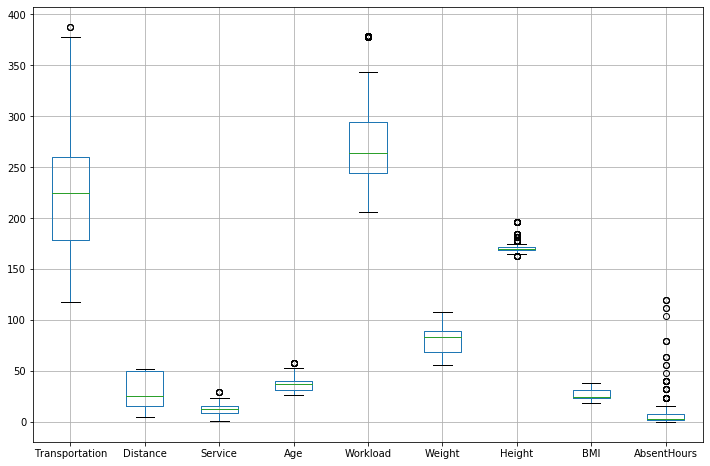

In [20]:
data.boxplot(figsize=(12, 8))

In [21]:
scaled_data = pd.DataFrame(scale(data), columns=data.columns)

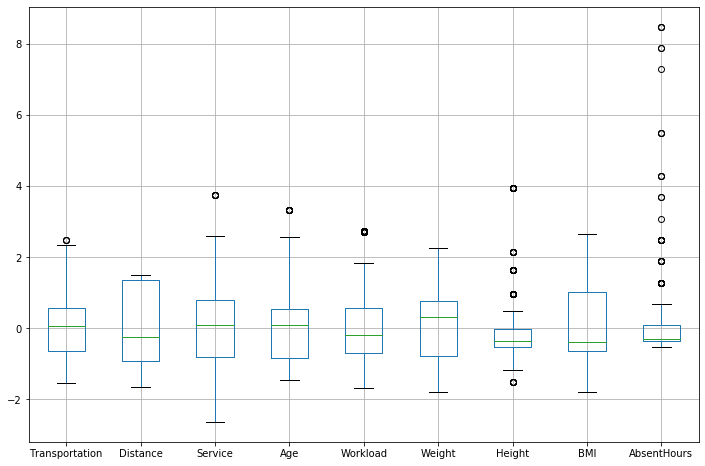

In [22]:
scaled_data.boxplot(figsize=(12, 8))

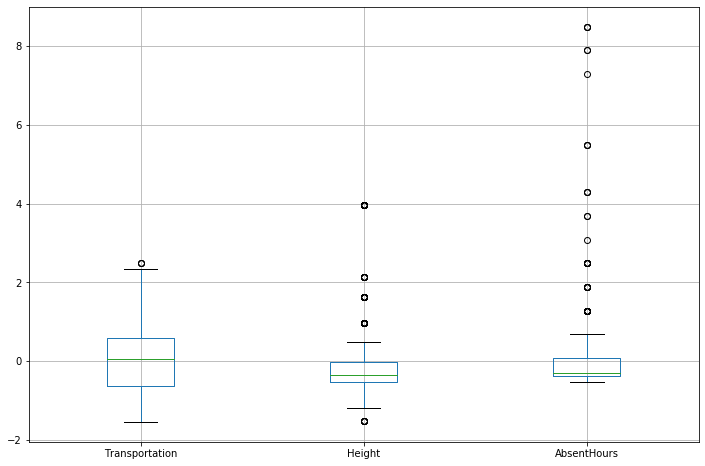

In [23]:
scaled_data.boxplot(column=['Transportation', 'Height', 'AbsentHours'], figsize=(12, 8))

In [24]:
scaled_data['Robust_Workload'] = robust_scale(data['Workload'])

scaled_data['Robust_Height'] = robust_scale(data['Height'])

scaled_data['Robust_AbsentHours'] = robust_scale(data['AbsentHours'])

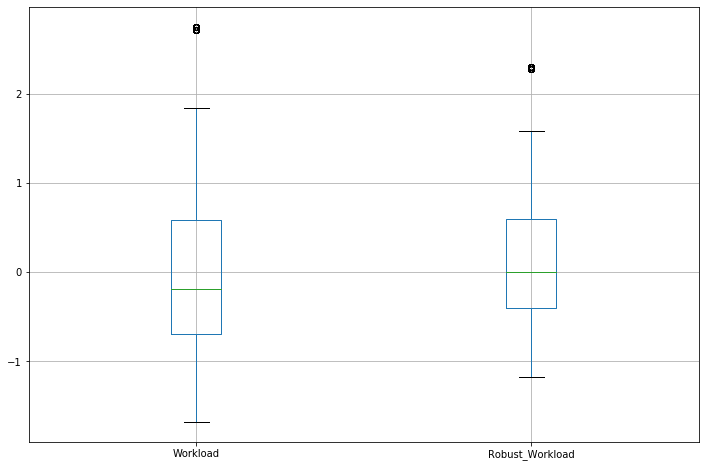

In [25]:
scaled_data.boxplot(column=['Workload', 'Robust_Workload'], figsize=(12, 8))

As we can see the robust scaler centers data around the median

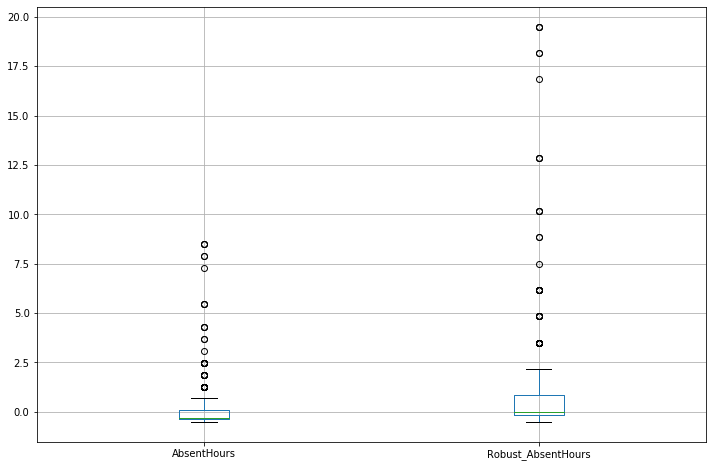

In [27]:
scaled_data.boxplot(column=['AbsentHours', 'Robust_AbsentHours'], figsize=(12, 8))

In [28]:
robust_scaled_data = pd.DataFrame(robust_scale(data), columns=data.columns)

In [29]:
robust_scaled_data.describe()

,Transportation,Distance,Service,Age,Workload,Weight,Height,BMI,AbsentHours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,-0.045312,0.106797,-0.063707,-0.061111,0.145319,-0.198243,0.704955,0.239575,0.654054
std,0.826571,0.436376,0.626410,0.719864,0.783827,0.644161,2.011665,0.612207,2.221833
min,-1.320988,-0.617647,-1.714286,-1.111111,-1.170620,-1.350000,-2.333333,-0.857143,-0.500000
25%,-0.567901,-0.294118,-0.571429,-0.666667,-0.398595,-0.700000,-0.333333,-0.142857,-0.166667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.432099,0.705882,0.428571,0.333333,0.601405,0.300000,0.666667,0.857143,0.833333
max,2.012346,0.764706,2.285714,2.333333,2.300522,1.250000,8.666667,1.857143,19.500000


Similarly to standard scaler, we can use the robust scaler API. We can decide:
- copy: whetehr you want a copy of the scaled data
- with_centering: data centered around the median
- with_scaling: whether the data will be scaled
- fit_transform works similarly in logic to teh standard scaler fit_transform application

In [30]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)

robust_scaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

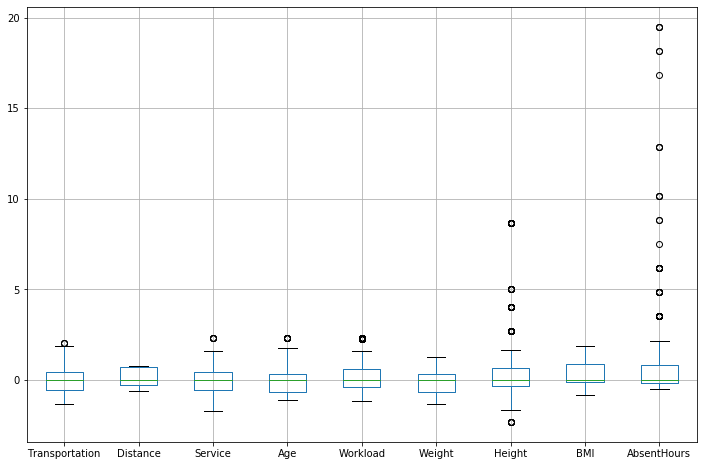

In [31]:
robust_scaled_array = robust_scaler.fit_transform(data)

robust_scaled_data = pd.DataFrame(robust_scaled_array, columns=data.columns)

robust_scaled_data.boxplot(figsize=(12, 8))

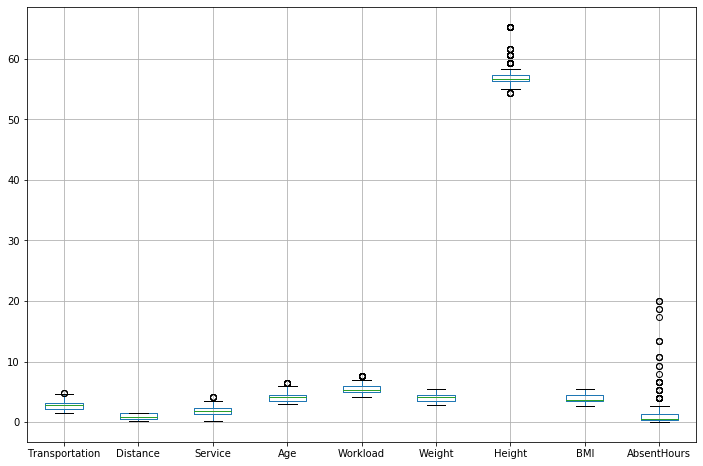

In [32]:
robust_scaler = RobustScaler(copy=True, with_centering=False, with_scaling=True)

robust_scaled_array = robust_scaler.fit_transform(data)

robust_scaled_data = pd.DataFrame(robust_scaled_array, columns=data.columns)

robust_scaled_data.boxplot(figsize=(12, 8))

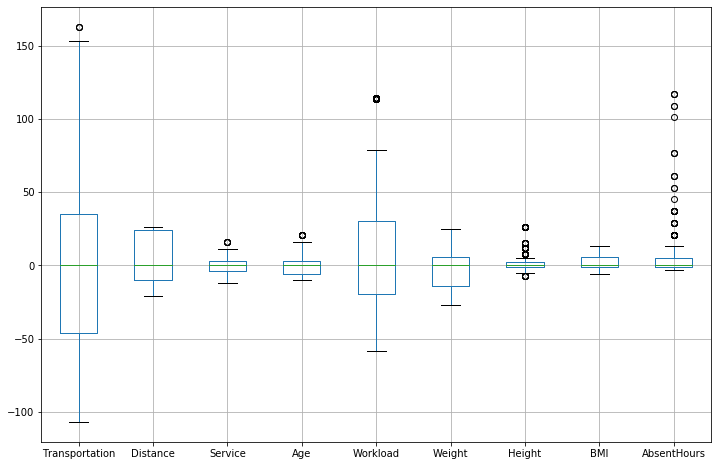

In [33]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=False)

robust_scaled_array = robust_scaler.fit_transform(data)

robust_scaled_data = pd.DataFrame(robust_scaled_array, columns=data.columns)

robust_scaled_data.boxplot(figsize=(12, 8))